### Graph results

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot_output(output_file):
    is_4k = "4K" in output_file
    is_fp16 = "fp16" in output_file

    # Read the file line by line
    cublas_lines = []
    torch_lines = []
    triton_matmul_lines = []
    triton_matmul_persistent_lines = []

    with open(output_file, "r") as f:
        lines = f.readlines()
        for line in lines:
            if " cublas "  in line:
                cublas_lines.append(line)
            elif " matmul_kernel " in line:
                triton_matmul_lines.append(line)
            elif " matmul_kernel_persistent " in line:
                triton_matmul_persistent_lines.append(line)
            elif " torch " in line:
                torch_lines.append(line)

    source_to_lines = {
        "cublas": cublas_lines,
        "torch": torch_lines,
        "triton_matmul": triton_matmul_lines,
        "triton_matmul_persistent": triton_matmul_persistent_lines
    }

    if is_4k:
        Ks = list(np.arange(256, 4096, 256))
    else:
        Ks = list(np.arange(512, 8193, 512))

    source_to_tflops = {
        "cublas" : [],
        "torch" : [],
        "triton_matmul" : [],
        "triton_matmul_persistent" : [],
    }

    for source in ["cublas", "torch", "triton_matmul", "triton_matmul_persistent"]:
        lines = source_to_lines[source]
        for K in Ks:
            found = False
            for line in lines:
                if f"K={K}]" in line:
                    data = float(line.split(" ")[1])
                    source_to_tflops[source].append(data)
                    found = True
                    break
            assert found, f"Did not find K={K} in {source}"

    # Plotting
    plt.figure(figsize=(12, 8))
    for key, values in source_to_tflops.items():
        plt.plot(Ks, values, label=key.capitalize())

    if is_4k:
        title = f"C=AxB -- TFLOPS vs. K (M=N=4096, {"fp16" if is_fp16 else "fp8"})"
    else:
        title = f"C=AxB -- TFLOPS vs. K (M=N=8192, {"fp16" if is_fp16 else "fp8"})"

    plt.title(title, fontsize=16)
    plt.xlabel("K", fontsize=14)
    plt.ylabel("TFPLOS", fontsize=14)
    plt.legend(title="Method", fontsize=12)
    plt.grid(True)
    plt.show()

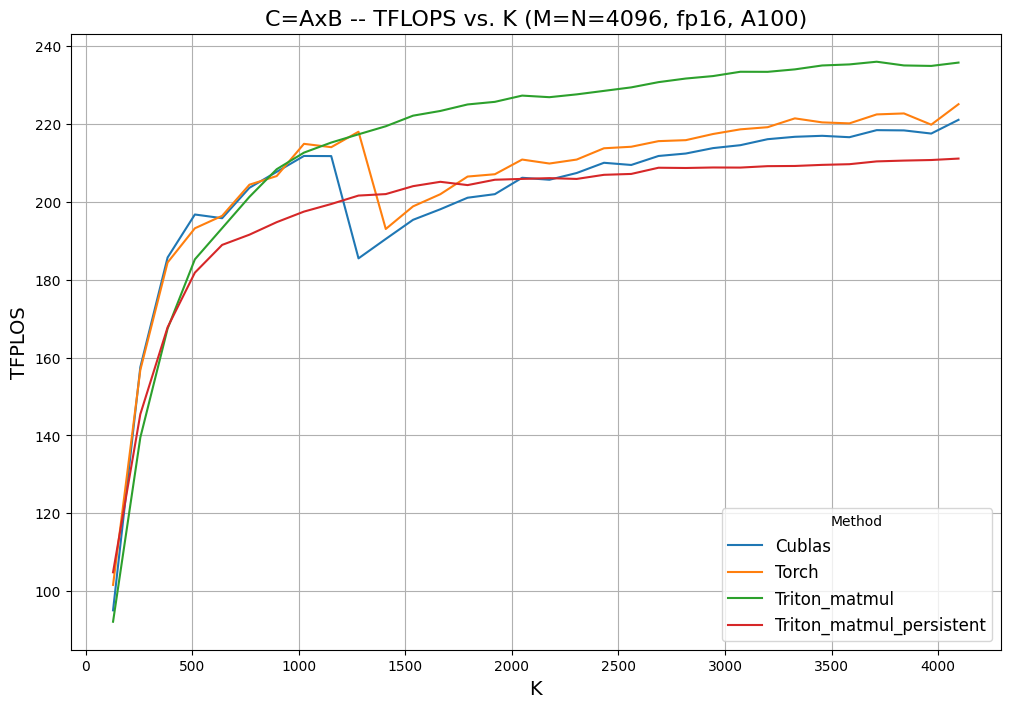

In [ ]:
plot_output("matmul_M=N=4K_output_fp16.txt")

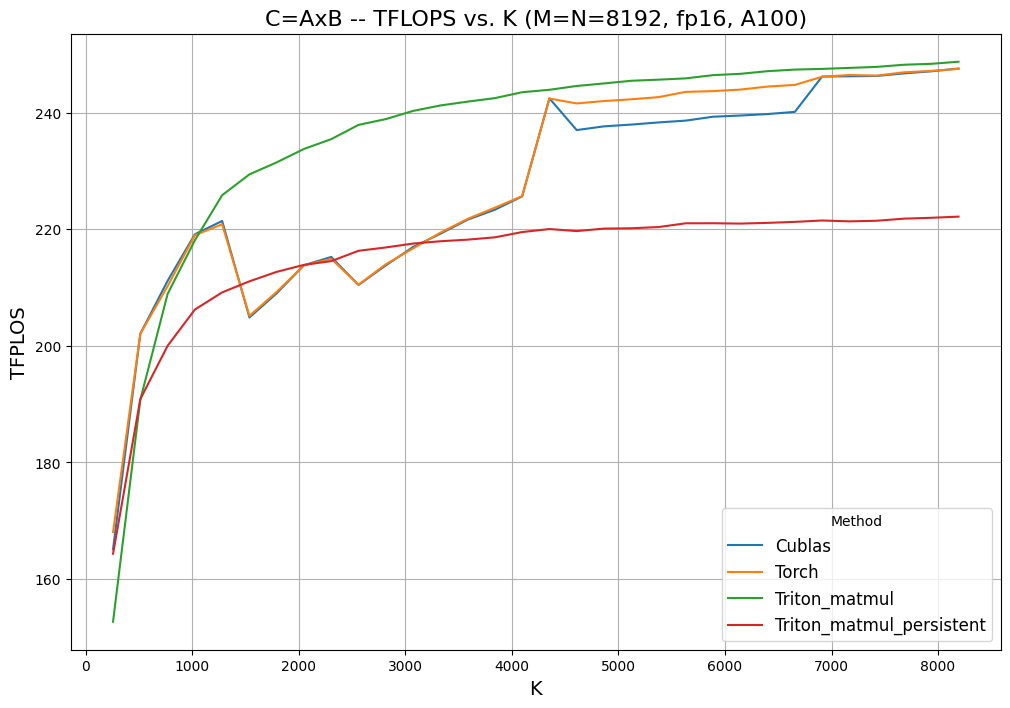

In [ ]:
plot_output("matmul_M=N=8K_output_fp16.txt")

In [ ]:
plot_output("matmul_M=N=4K_output_fp8.txt")

In [ ]:
plot_output("matmul_M=N=4K_output_fp8.txt")